In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [19]:
df = pd.read_csv('TravelInsurancePrediction.csv')

In [20]:
df.head()

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [30]:
## Soal 1 : Descriptive Statistic

In [21]:
# Me-rename nama di column pertama agar nama column sesuai dari sumber data di Kaggle, karena setelah di read CSV nya, nama kolom pertama 
# menjadi "Unnamed : 0"
new_column_name = "Index"
df.rename(columns={df.columns[0]: new_column_name}, inplace=True)

In [22]:
df.head()

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Index                1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


Karena semua tipe data sudah sesuai dengan kolom masing masing, kita tidak akan mengubah bentuk data dari semua column

In [24]:
df.isna().sum()

Index                  0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

Selain itu, dapat dilihat bahwa tidak ada kolom yang memiliki missing values, jadi, masalah missing values bisa dilewati

In [25]:
#pengelompokan data berdasarkan jenis
nums = ['Index', 'Age', 'AnnualIncome', 'FamilyMembers', 'ChronicDiseases','TravelInsurance']
cats = ['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']

In [26]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,Index,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


Dari angka2 summary statistic diatas, sekilias bisa dilihat tidak ada abnormalitas dari tiap kolom di data ini berdasarkan jarak yang masih
normal antara mean dan median di kolom2 diatas, terutama kolom Age, AnnualIncome, dan FamilyMembers dikarenakan kolom numerical lain
sebenarnya merupakan data yang bersifat nominal. Tetapi, analisa lebih lanjut akan dilakukan di univariate analysis

In [27]:
# ringkasan statistik dari kolom categorical
df[cats].describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


In [ ]:
Sama dengan data numerik, data di categorical pun tidak menunjukkan abnormality. Akan tetapi, analisa lebih lanjut tetap diperlukan di 
univariate analysis.

In [ ]:
## Soal 2: Univariate Analysis

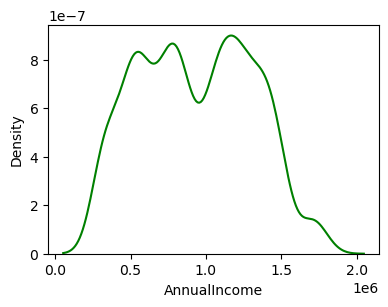

In [28]:
selected_column = ['AnnualIncome']

plt.figure(figsize=(15, 6))  # Adjust the figure size

for i in range(len(selected_column)):
    plt.subplot(2, 4, i + 1)  # 2x4=8 > len(nums)=7
    sns.kdeplot(x=df[selected_column[i]], color='green')
    plt.xlabel(selected_column[i])

plt.tight_layout(pad=2)  # Adjust the spacing between subplots
plt.show()

<Axes: xlabel='FamilyMembers', ylabel='Count'>

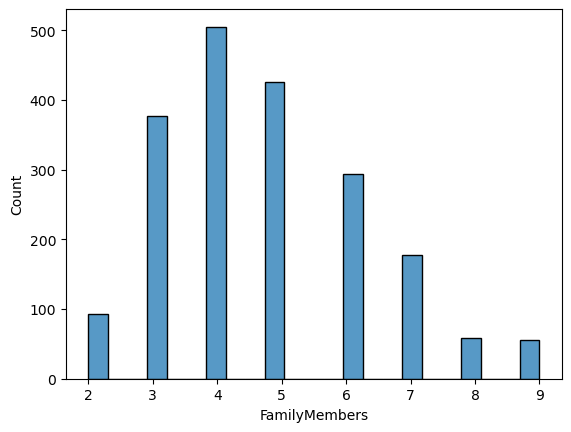

In [29]:
sns.histplot(x='FamilyMembers', data=df )

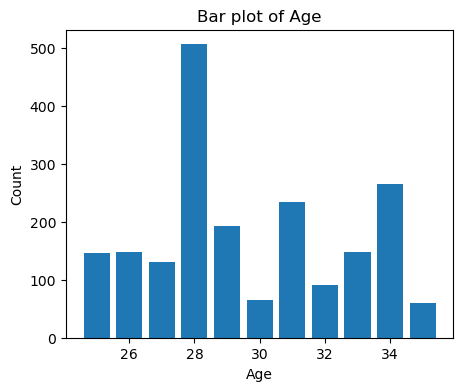

In [30]:
# Count the occurrences of each value in the column
value_counts = df['Age'].value_counts()

# Create bar plot
plt.figure(figsize=(5, 4))
plt.bar(value_counts.index, value_counts.values)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar plot of Age')

# Show plot
plt.show()

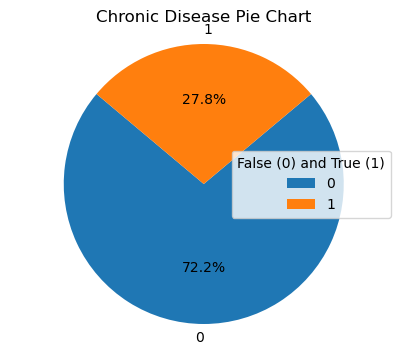

In [31]:
# Count occurrences of each unique boolean value
bool_counts = df['ChronicDiseases'].value_counts()

# Create pie chart
plt.figure(figsize=(5, 4))
plt.pie(bool_counts, labels=bool_counts.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add legend
plt.legend(bool_counts.index, title='False (0) and True (1)', loc='best')

# Add title
plt.title('Chronic Disease Pie Chart')

# Show plot
plt.show()

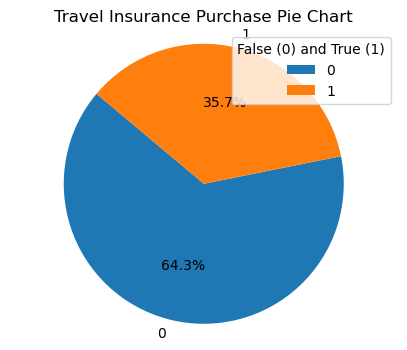

In [32]:
# Count occurrences of each unique boolean value
bool_counts2 = df['TravelInsurance'].value_counts()

# Create pie chart
plt.figure(figsize=(5, 4))
plt.pie(bool_counts2, labels=bool_counts2.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add legend
plt.legend(bool_counts2.index, title='False (0) and True (1)', loc='best')

# Add title
plt.title('Travel Insurance Purchase Pie Chart')

# Show plot
plt.show()

- Dari feature AnnualIncome, dapat dilihat bahwa distribusi nya cukuo normal, sehingga masalah outliers di feature ini tidak harus 
  dikhawatirkan
- Lalu, di feature FamilyMembers dan Age, ada kemungkinan bahwa dua feature ini slightly positively skewed. Untuk dianalisa lebih lanjut,
  analisa menggunakan boxplot akan dilakukan
- Pie chart feature ChronicDisease menggambarkan bahwa mayoritas konsumen tidak mengidap penyakit kronis. Sementara itu, pie chart variable
  TravelInsurance mennggambarkan hanya sedikit konsumen yang membeli paket travel insurance di data ini(Value 1 < Value 0). Pada step data
  preprocessing, harus diberlakukan proses oversampling atau undersampling pada variabel TravelInsurance sebagai target variable agar proses
  modelling lebih representatif dan akurat


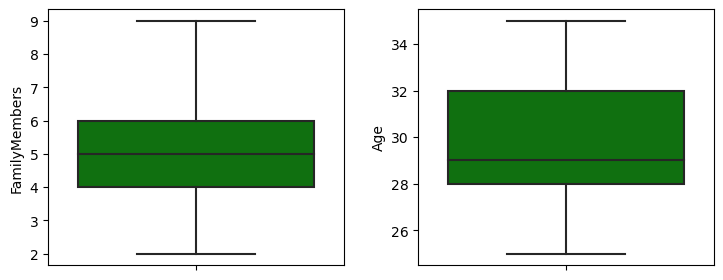

In [25]:
selected_column2 = ['FamilyMembers','Age']
plt.figure(figsize=(15, 6))  # Adjust the figure size

for i in range (len(selected_column2)) :
    plt.subplot (2, 4, i+1) 
    sns.boxplot(y=df[selected_column2[i]], color='green', orient='v')

plt.tight_layout(pad=2)  # Adjust the spacing between subplots
plt.show()

Dari boxplot diatas, dapat dilihat bahwa dua feature ini tidak memiliki masalah outliers. Maka dari itu, bisa disimpulkan bahwa numerical
features di data ini tidak memiliki masalah outliers

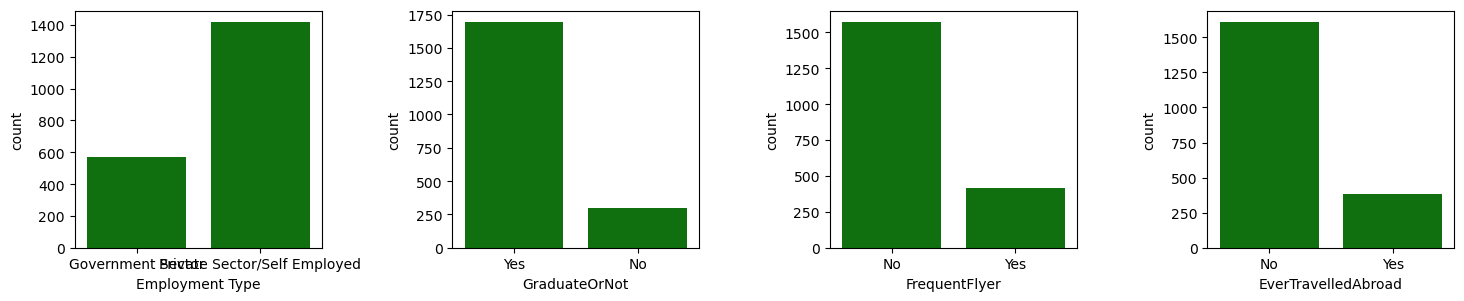

In [33]:
cats_features = cats

plt.figure(figsize=(15, 6))

# Adjust subplot arrangement to match the number of features:
num_rows = 2
num_cols = min(4, len(cats_features))  # Ensure columns don't exceed feature count

for i in range(len(cats_features)):
    plt.subplot(num_rows, num_cols, i + 1)  # Use the calculated number of columns
    sns.countplot(x=df[cats_features[i]], color='green')
    plt.xlabel(cats_features[i])

plt.tight_layout(pad=2)
plt.show()

- Dari countplot diatas, dapat dilihat bahwa kebanyakan customer bekerja di sektor swasta, yang mana bisa dibilang expected karena normalnya
  pekerja dari sektor swasta lebih banyak dari sektor pemerintahan di dalam suatu negara
- Lalu, kebanyakan customer adalah seroang "college graduate" dibandingkan sebaliknya
- Selain itu, ditemukan bahwa kebanyakan customer tidak sering melakukan purchase tiket pesawat terbang
- Terakhir, dapat ditemukan juga bahwa kebanyakan customer tidak pernah travel ke luar negeri sebelumnya

In [ ]:
## Soal 3: Multivariate Analysis

In [34]:
df_nums = df[['Index','Age','AnnualIncome','FamilyMembers','ChronicDiseases','TravelInsurance']]
df_cats = df[['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']]

In [35]:
df['Employment Type'].replace({'Government Sector': 1, 'Private Sector/Self Employed': 2}, inplace=True)

In [36]:
df.head()

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,Yes,400000,6,1,No,No,0
1,1,31,2,Yes,1250000,7,0,No,No,0
2,2,34,2,Yes,500000,4,1,No,No,1
3,3,28,2,Yes,700000,3,1,No,No,0
4,4,28,2,Yes,700000,8,1,Yes,No,0


In [37]:
# Define a mapping dictionary
mapping = {'No': 0, 'Yes': 1}

# Replace values in the DataFrame using the mapping
df.replace(mapping, inplace=True)

In [38]:
df.head()

,Index,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,1,1,400000,6,1,0,0,0
1,1,31,2,1,1250000,7,0,0,0,0
2,2,34,2,1,500000,4,1,0,0,1
3,3,28,2,1,700000,3,1,0,0,0
4,4,28,2,1,700000,8,1,1,0,0


<Axes: >

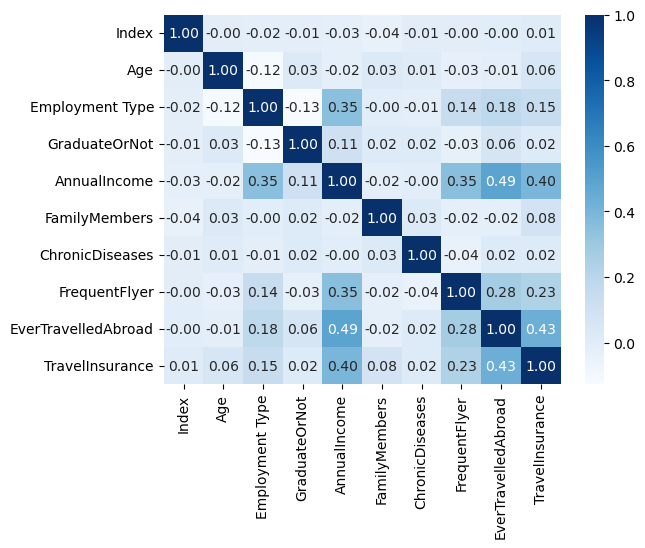

In [39]:
sns.heatmap(df.corr(),cmap='Blues',annot=True, fmt='.2f')

C:\Users\melvi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


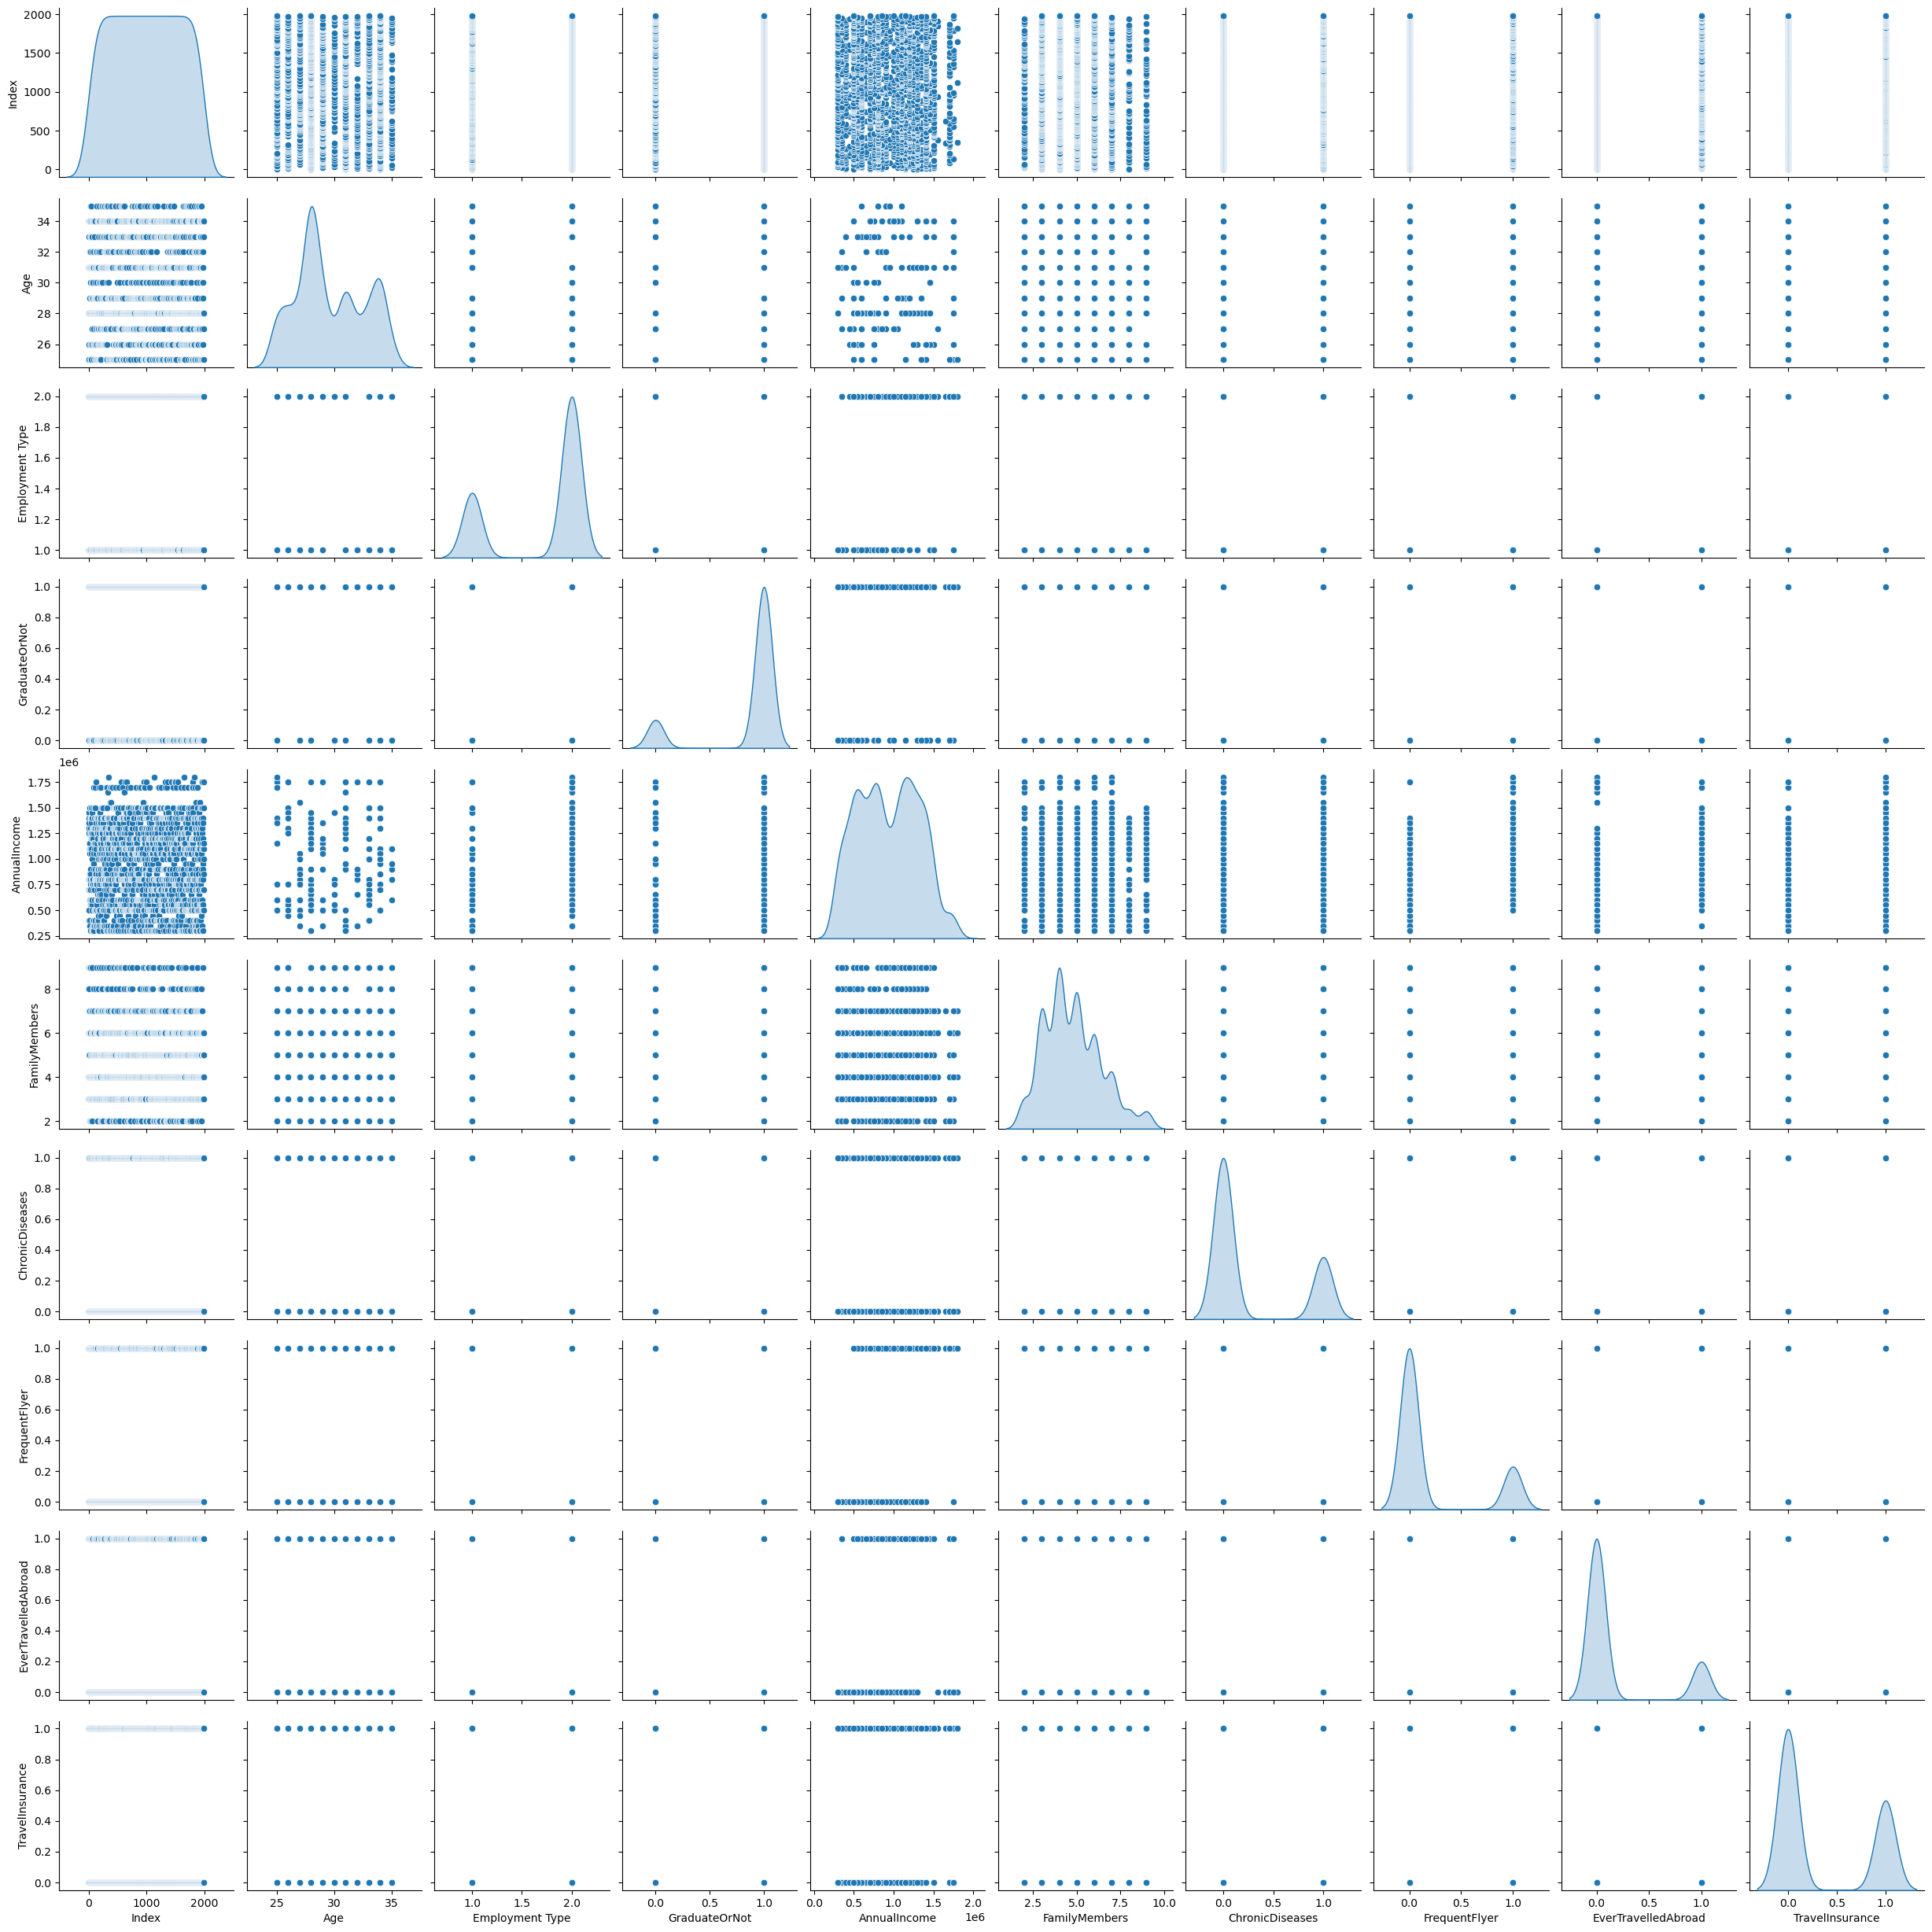

In [40]:
sns.pairplot(df, diag_kind='kde')

Insight:
    
- Dari multivariate analysis diatas, dapat dilihat ada korelasi yang sedikit kuat antara target variable "TravelInsurance" dengan dua
  features, yaitu "EverTravelledAbroad" dan "AnnualIncome". Sehingga, dua features ini bisa di consider untuk di keep dalam pemodelan di 
  tahap selanjutnnya. Selain dari dua features ini, tidak diindikasikan ada korelasi yang menjanjikan dari features yang lain dengan 
  target variable. Karena itu, proses t-test pada setiap feature akan dilakukan untuk menganalisa lebih dalam pentingnya setiap feature
  terhadap target variable "TravelInsurance"

- Selain itu, features seperti "AnnualIncome" dan "EverTravelledAbroad" kemungkinan mengalami fenomena multicollinearity. Karena itu, analisa lebih lanjut untuk mengecek multicollinearity akan dilakukan menggunaka VIF

In [41]:
# List to store results
t_test_results = []

# Iterate over each feature
for column in df.columns:
    if column != 'TravelInsurance':  # Skip the target variable
        feature = df[column]
        target = df['TravelInsurance']
        
        # Perform two-sample t-test
        t_statistic, p_value = stats.ttest_ind(feature[target == 0], feature[target == 1])
        
        # Store results
        t_test_results.append((column, t_statistic, p_value))

# Convert results to DataFrame
results_df = pd.DataFrame(t_test_results, columns=['Feature', 'T-Statistic', 'P-Value'])

# Display the results
print(results_df)

               Feature  T-Statistic       P-Value
0                Index    -0.276050  7.825387e-01
1                  Age    -2.725506  6.476684e-03
2      Employment Type    -6.660267  3.527704e-11
3        GraduateOrNot    -0.843703  3.989372e-01
4         AnnualIncome   -19.257785  6.635018e-76
5        FamilyMembers    -3.571635  3.632080e-04
6      ChronicDiseases    -0.810542  4.177259e-01
7        FrequentFlyer   -10.631295  1.032551e-25
8  EverTravelledAbroad   -21.413067  1.088979e-91


- Dari hasil t-test ini, dapat di highlight bahwa features "AnnualIncome", "EverTravelledAbroad","Employment Type", "FrequentFlyer", "Age", dan "FamilyMembers"
  memiliki significance terhadap target variable yaitu "TravelInsurance"

In [53]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.drop(['TravelInsurance','Index'], axis=1).columns
vif_data["VIF"] = [variance_inflation_factor(df.drop(['TravelInsurance','Index'], axis=1).values, i)
                          for i in range(len(df.drop(['TravelInsurance','Index'], axis=1).columns))]
vif_data

,feature,VIF
0,Age,24.783328
1,Employment Type,15.485388
2,GraduateOrNot,6.752638
3,AnnualIncome,11.137858
4,FamilyMembers,9.295239
5,ChronicDiseases,1.388029
6,FrequentFlyer,1.482909
7,EverTravelledAbroad,1.640893


Berdasarkan hasil diatas, dapat dilihat bahwa feature Age, Employment Type dan Annual Income memiliki multicollinearity yang tinggi terhadap
feature yang lain. Karena berdasarkan correlation heatmap dan VIF test, tiga features yang disebutkan memiliki masalah multicollinearity, harus 
dipertimbangkan untuk membuang ketiga features ini.

Berdasarkan t-stats, p-value, dan VIF yang sudah dijalankan, features yang akan kita rekomendasikan untuk digunakan di project kita adalah: "FamilyMembers", "FrequentFlyer", dan "EverTravelledAbroad". Lalu, "TravelInsurance" akan digunakan sebagai target variabel kita.

## Business Insights & Recommendation

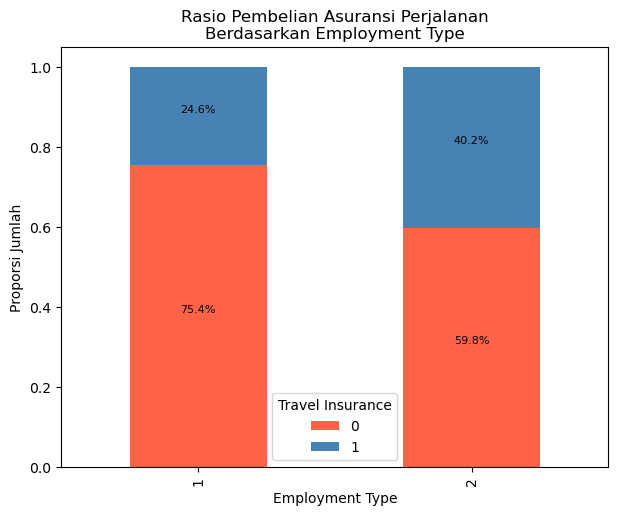

In [42]:
plt.figure(figsize=(24, 12))

# Employment Type
plt.subplot(2, 3, 1)
prop_df = df.groupby('Employment Type')['TravelInsurance'].value_counts(normalize=True).unstack()

prop_df.plot(kind='bar', stacked=True, color=['#FF6347', '#4682B4'], ax=plt.gca())
plt.title('Rasio Pembelian Asuransi Perjalanan\nBerdasarkan Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Proporsi Jumlah')
plt.legend(title='Travel Insurance')

for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

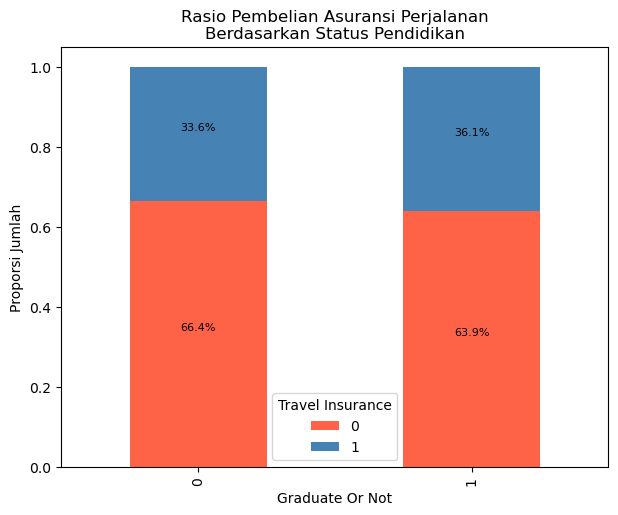

In [43]:
plt.figure(figsize=(24, 12))

# Graduate Or Not
plt.subplot(2, 3, 2)
prop_df = df.groupby('GraduateOrNot')['TravelInsurance'].value_counts(normalize=True).unstack()

prop_df.plot(kind='bar', stacked=True, color=['#FF6347', '#4682B4'], ax=plt.gca())
plt.title('Rasio Pembelian Asuransi Perjalanan\nBerdasarkan Status Pendidikan')
plt.xlabel('Graduate Or Not')
plt.ylabel('Proporsi Jumlah')
plt.legend(title='Travel Insurance')

for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

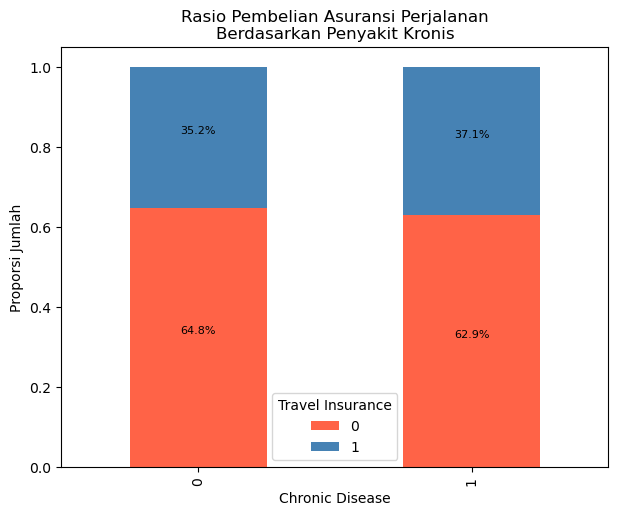

In [44]:
plt.figure(figsize=(24, 12))

# Chronic Diseases
plt.subplot(2, 3, 3)
prop_df = df.groupby('ChronicDiseases')['TravelInsurance'].value_counts(normalize=True).unstack()

prop_df.plot(kind='bar', stacked=True, color=['#FF6347', '#4682B4'], ax=plt.gca())
plt.title('Rasio Pembelian Asuransi Perjalanan\nBerdasarkan Penyakit Kronis')
plt.xlabel('Chronic Disease')
plt.ylabel('Proporsi Jumlah')
plt.legend(title='Travel Insurance')

for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

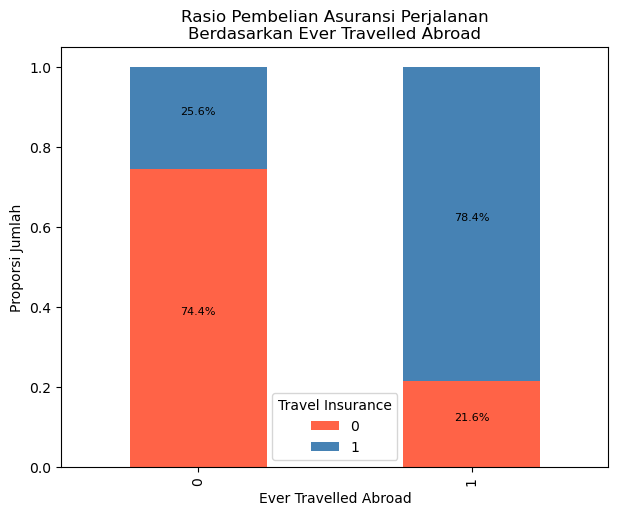

In [45]:
plt.figure(figsize=(24, 12))

#Travelled Abroad
plt.subplot(2, 3, 4)
prop_df = df.groupby('EverTravelledAbroad')['TravelInsurance'].value_counts(normalize=True).unstack()

prop_df.plot(kind='bar', stacked=True, color=['#FF6347', '#4682B4'], ax=plt.gca())
plt.title('Rasio Pembelian Asuransi Perjalanan\nBerdasarkan Ever Travelled Abroad')
plt.xlabel('Ever Travelled Abroad')
plt.ylabel('Proporsi Jumlah')
plt.legend(title='Travel Insurance')

for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

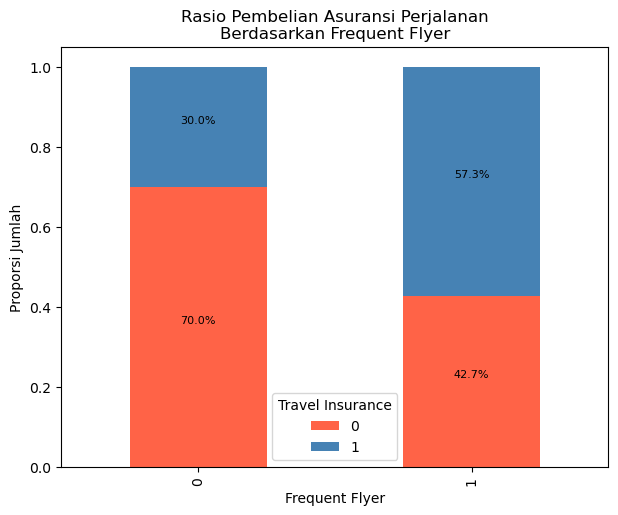

In [46]:
plt.figure(figsize=(24, 12))

# Frequent Flyer
plt.subplot(2, 3, 5)
prop_df = df.groupby('FrequentFlyer')['TravelInsurance'].value_counts(normalize=True).unstack()

prop_df.plot(kind='bar', stacked=True, color=['#FF6347', '#4682B4'], ax=plt.gca())
plt.title('Rasio Pembelian Asuransi Perjalanan\nBerdasarkan Frequent Flyer')
plt.xlabel('Frequent Flyer')
plt.ylabel('Proporsi Jumlah')
plt.legend(title='Travel Insurance')

for p in plt.gca().patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    plt.gca().annotate(f'{height:.1%}', (x + width / 2, y + height / 2), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

plt.show()

C:\Users\melvi\AppData\Local\Temp\ipykernel_11204\906478657.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='FamilyMembers', y='TravelInsurance', data=df, ci=None, estimator=lambda x: sum(x) / len(x) * 100)


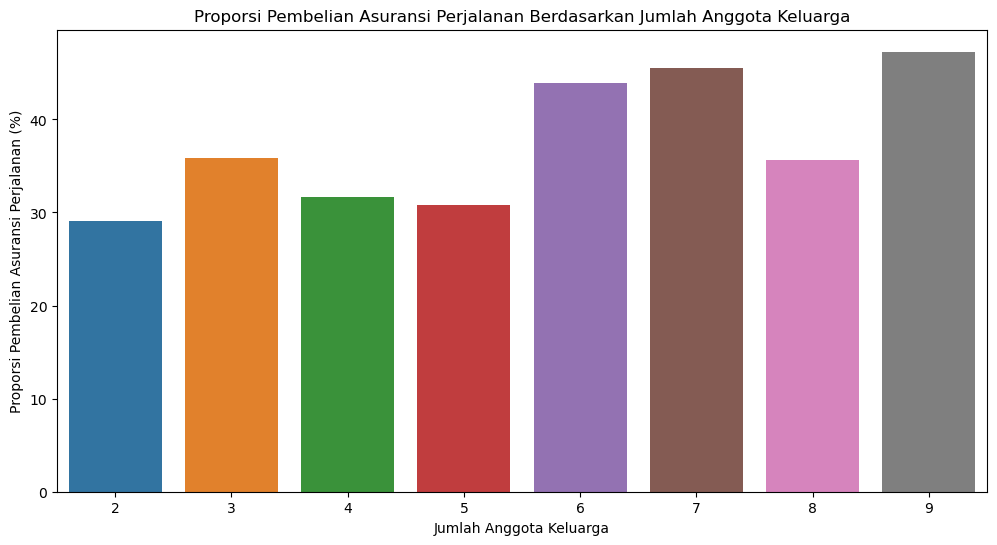

C:\Users\melvi\AppData\Local\Temp\ipykernel_11204\906478657.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Age', y='TravelInsurance', data=df, ci=None, estimator=lambda x: sum(x) / len(x) * 100, palette='Set1')


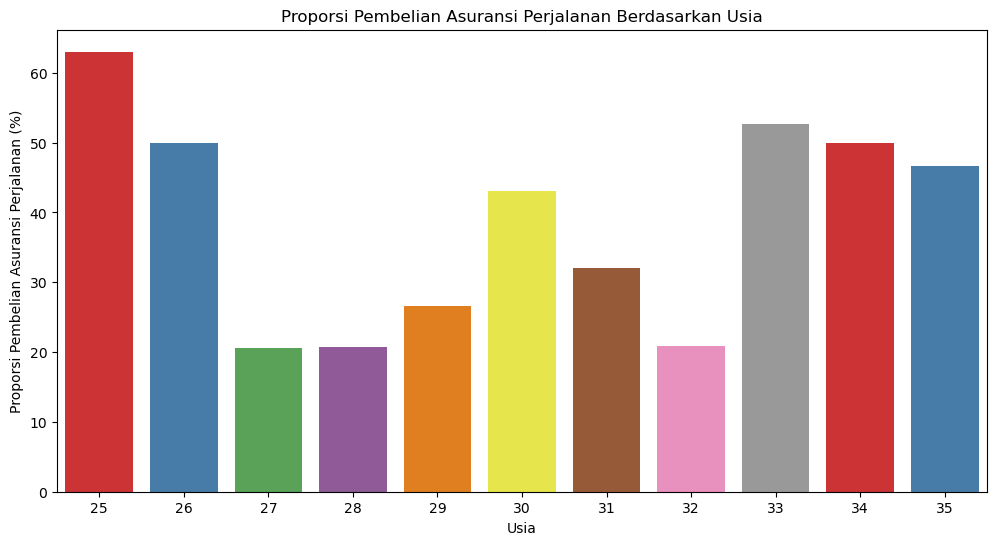

In [47]:
# Jumlah Anggota Keluarga dan Pembelian Asuransi
plt.figure(figsize=(12, 6))
sns.barplot(x='FamilyMembers', y='TravelInsurance', data=df, ci=None, estimator=lambda x: sum(x) / len(x) * 100)
plt.title('Proporsi Pembelian Asuransi Perjalanan Berdasarkan Jumlah Anggota Keluarga')
plt.xlabel('Jumlah Anggota Keluarga')
plt.ylabel('Proporsi Pembelian Asuransi Perjalanan (%)')
plt.show()

# Usia dan Pembelian Asuransi
plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='TravelInsurance', data=df, ci=None, estimator=lambda x: sum(x) / len(x) * 100, palette='Set1')
plt.title('Proporsi Pembelian Asuransi Perjalanan Berdasarkan Usia')
plt.xlabel('Usia')
plt.ylabel('Proporsi Pembelian Asuransi Perjalanan (%)')
plt.show()